- scikit-learn should come with Anaconda but make sure by running "pip install scikit-learn" in the Anaconda command prompt or here: !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Machine Learning


What is Machine Learning all about?

$$ Y = f(X) + e $$
- where Y is the variable we are interested (also known as dependent variable or response)
    - Example: House prices or stock returns
- X = $X_1$, $X_2$,..., $X_p$ are the predictors (also known as independent variables or features)
    - Example: Location, Profitability ratios
- e is the error term which captures the changes in Y that cannot be explained by the predictor X. X and e are independent. 
- $f(X)$ is the function that captures the relationship between X and Y
- Typically, $f(X)$ is unknown and has to be estimated
- Statistical Learning refers to the approaches that are used to estimate f
- We would like to know about f for 2 reasons
    - Prediction
    - Inference

# Prediction
- In many settings, we observe Xs. But we do not know the Y. 
- So we need to predict Y
- Example 1: House Price
    - We know the area, number of bedrooms, etc., (X)
    - We do not know the price of the house (Y)
- Example 2: Expected Returns
    - We know the profitability, leverage, of companies (X)
    - We do not know the future returns (Y)
- Our goal in this case is to estimate f and to predict Y
$$ \hat{Y} = \hat{f}(X) $$
    - $\hat{f}(X)$ is our estimate of $f$
    - $\hat{Y}$ is the predicted value of $Y$
- $\hat{f}(X)$ is kind of like a black box here. 
    - We do not care what form it takes, as long as we get good predictions


# Inference
- Goal is to understand relationship between X and Y
    - Which predictiors X are related to the response Y?
    - What is the relationship?
        - Positive or Negative
        - Linear or nonlinear
- Prediction and inference need not be mutually exclusive
- Example:
    - Whether a stock is over-valued or under-valued (Prediction)
    - How much will stock price increase if Return on Equity (ROE) increases by 5% (Inference)

- Linear models 
    - Helpful in inference
    - Predictions might not be accurate

- Non-linear models
    - Better predictions
    - Inference is difficult
    
- There is a tradeoff between prediction accuracy and model interpretability


# Estimating f

- Let us say we have data regarding 100 houses in an area
    - House Prices (Y)
    - House Features (X)
        - Area
        - Bedrooms
        - Baths
        
## Training Data

- We can use the data as training data to estimate f

### Parametric Methods
- We assume a functional form of the relationship
- Linear relationship 
$$ f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...+ \beta_p X_p$$
- Now our task is simplified as we only have to estimate the parameters ($\beta$s)
- Then,  we use the data to fit or train the model
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...+ \beta_p X_p + e $$
- The flexibility is low in parametric models

### Non-parametric Models
- We do not make any functional form assumptions
- Can fit the data closer
- However, large number of observations are required
- Risk of over-fitting

## Supervised Learning
- For each set of predictors (X), there is a response Y
- Think of house prices
    - In our sample, we have set of features like area
    - We also observe house prices
- Linear Regression
- Logistic Regression
    
## Unsupervised Learning
- The response is not observed
- We might want to group some observations on similar characteristics
- Clustering

# Regression
- The response Y is a quantitative variable
- It takes numerical values
- Example
    - House prices
    - Stock returns
    
# Classification
- Response Y is qualitative
- Example
    - Will the company default or not?
    
- In general, we do not worry that much about X having some qualitative variables
    - State of incorporation

## Accuracy of $\hat{Y}$
    
$$ E(Y-\hat{Y})^2 = [f(X)-\hat{f}(X)]^2 + Var(e) $$
- $ E(Y-\hat{Y})^2 $ measures how good our prediction is
- $[f(X)-\hat{f}(X)]^2$ is reducible error
    - By coming up with better estimate of $f$ we can reduce this
- $Var(e)$ is the irreducible error
    - We cannot reduce this because e is part of Y that cannot be explained by X

## Model Accuracy
- We care about the model's prediction in unseen data (Testing Dataset)
- Let us say we had a training set of n observations 
- ${(x_1, y_1),(x_2, y_2),...,(x_n, y_n)}$
- Think of this as the set of area of house and house prices
- We can use different models and arrive at estimate of $\hat{f}$
- The performance of the model in training dataset can be measured using mean square error (MSE)
$$ Training \ MSE = \frac{1}{n} \Sigma (y_i - \hat{f}(x_i))^2 $$ 
- If we are focussed on prediction
- We care about how good $\hat{f}$ does with new data that was not a part of training dataset
- Let us use a test dataset of m observations
- ${(x_1^t, y_1^t),(x_2^t, y_2^t),...,(x_m^t, y_m^t)}$
$$ Test \ MSE = \frac{1}{m} \Sigma (y_i^t - \hat{f}(x_i^t))^2 $$
- We can use different models to estimate f in the training dataset
- We will then check the accuracy of the model in test dataset
- We will pick the best model based on performance in test dataset

# House Prices
- Let us use some models to predict house prices
- Kaggle provides housing data of King County in Washington from May 2014 to May 2015


In [2]:
# Extract housing data
#housing = pd.read_csv("https://datascience.quantecon.org/assets/data/kc_house_data.csv")
housing = pd.read_csv("kc_house_data.csv")

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


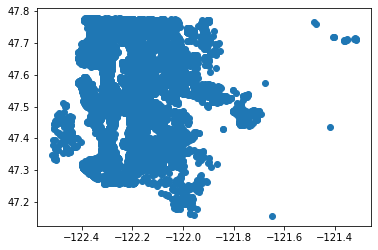

In [4]:
plt.scatter(housing['long'], housing['lat'])

# Linear Regression
- Let us start with univariate regression
- Y is house price
- X is sqft living
- Linear Regression
$$ log(price) = \beta_0 + \beta_1 sqft \ living + e $$
- This is a parameteric method
- We just have to estimate the betas

In [5]:
X=housing.drop(['id', 'date', 'price'], axis=1).copy()
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
y=housing['price'].copy()
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [7]:
y.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

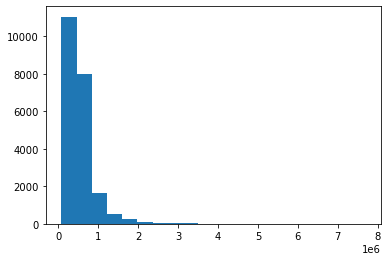

In [12]:
plt.hist(y, bins=20)
plt.show()

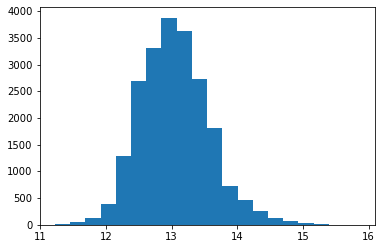

In [15]:
logy=np.log(y)
plt.hist(logy, bins=20)
plt.show()

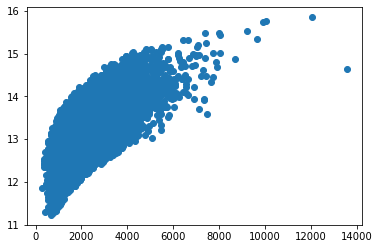

In [19]:
plt.scatter(X['sqft_living'], logy)
plt.show()

In [22]:
#Linear Regression of logy on sqft_living
unireg=LinearRegression()
unireg.fit(X[['sqft_living']],logy)

LinearRegression()

In [23]:
unireg.coef_

array([0.00039875])

In [24]:
logyhat=unireg.predict(X[['sqft_living']])
logyhat

array([12.68898501, 13.2432427 , 12.52549893, ..., 12.62518557,
       12.85645856, 12.62518557])

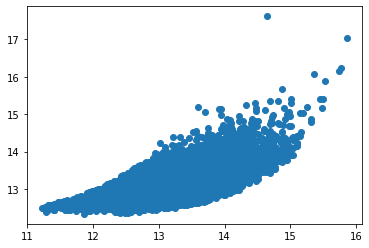

In [25]:
plt.scatter(logy,logyhat)

In [26]:
mean_squared_error(logy,logyhat)

0.14326910852241476

# Train and Test datasets
- We can manually select the train and test datasets
- For example, we can take the first 75% of observation to be training dataset and the last 25% as testing dataset
- However, the first 75% might have included houses from one area
- Therefore the model might not work properly when we apply the prediction to another dataset
- The best way is to randomly split the dataset into testing and training samples

In [48]:
X_train, X_test, logy_train, logy_test = train_test_split(X,logy,test_size=.25, random_state=0)

In [49]:
len(X_train)

16209

In [50]:
len(X_test)

5404

In [51]:
logy_train.describe()

count    16209.000000
mean        13.050584
std          0.527686
min         11.225243
25%         12.688499
50%         13.022543
75%         13.378555
max         15.856731
Name: price, dtype: float64

# Task 1
1. Fit multivariate regression model in training dataset
2. Plot the predicted value of prices against actual values in training data
3. Compute the root mean square error in training and compare it to the univariate case
4. Do the same for root mean square error in testing data


# Multivariate Regression
- We only used one predictor 
- We can do better by using more predictors
- We can use multivariate regression
$$ log(price) = \beta_0 + \beta_1 sqft \ living + \beta_2 bedrooms + e $$

In [52]:
multireg=LinearRegression()
multireg.fit(X_train,logy_train)
betas=pd.DataFrame(multireg.coef_)
betas=round(betas,5)

In [53]:
betas.index=X.columns
betas.columns=['LinReg']
betas

,LinReg
bedrooms,-0.00862
bathrooms,0.07009
sqft_living,0.00009
sqft_lot,0.00000
floors,0.07581
waterfront,0.37938
view,0.05751
condition,0.06279
grade,0.15643
sqft_above,0.00004


In [54]:
multireg_testpredict=multireg.predict(X_test)

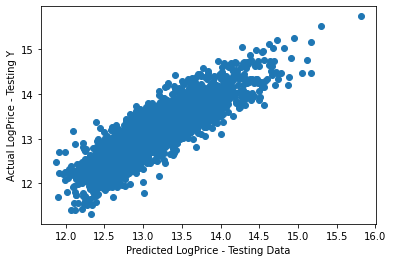

In [55]:
plt.scatter(multireg_testpredict,logy_test)
plt.xlabel('Predicted LogPrice - Testing Data')
plt.ylabel('Actual LogPrice - Testing Y')
plt.show()

In [56]:
mean_squared_error(logy_test,multireg_testpredict)

0.06193451200463952

- Repeat for diferent random states

In [58]:
numsim=100
mse_simul=np.zeros(numsim)
for i in range(numsim):
    X_train, X_test, logy_train, logy_test = train_test_split(X,logy,test_size=.25, random_state=i)
    multireg=LinearRegression()
    multireg.fit(X_train,logy_train)
    multireg_testpredict=multireg.predict(X_test)
    mse_simul[i]=mean_squared_error(logy_test,multireg_testpredict)

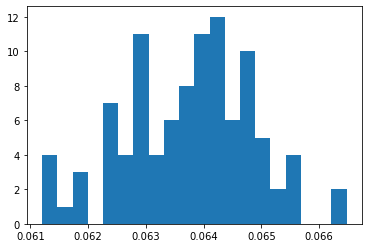

In [60]:
plt.hist(mse_simul, bins=20)
plt.show()

# Lasso
- Lasso is a linear model of the form $y=X\beta +e$
- But it has a different loss function
- Linear Regression or OLS minimize the sum of squared errors
$$ min (y - X\beta)^2 $$
- Lasso minimizes
$$ min \Sigma (y - X\beta)^2 + \alpha \Sigma |\beta|$$
- The intuition is that Lasso sets some coefficient to 0
- $\alpha$ is the regularization parameter
- Higher the $\alpha$ more coefficients are set to 0 

In [68]:
X_train, X_test, logy_train, logy_test = train_test_split(X,logy,test_size=.25, random_state=0)
lasso=Lasso(alpha=.25)
lasso.fit(X_train, logy_train)

Lasso(alpha=0.25)

In [69]:
betas['lasso_p25']=lasso.coef_
betas=round(betas,5)

In [70]:
betas

,LinReg,lasso_p1,lasso_p25
bedrooms,-0.00862,-0.00000,-0.00000
bathrooms,0.07009,0.00000,0.00000
sqft_living,0.00009,0.00031,0.00031
sqft_lot,0.00000,0.00000,0.00000
floors,0.07581,0.00000,0.00000
waterfront,0.37938,0.00000,0.00000
view,0.05751,0.00000,0.00000
condition,0.06279,0.00000,0.00000
grade,0.15643,0.00314,0.00000
sqft_above,0.00004,0.00000,-0.00000


<AxesSubplot:>

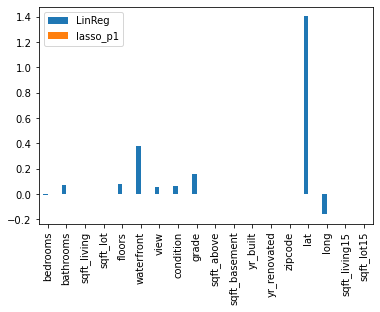

In [65]:
betas.plot.bar()

In [71]:
lassopred=lasso.predict(X_test)

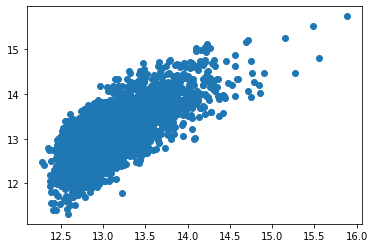

In [72]:
plt.scatter(lassopred,logy_test)
plt.show()

In [73]:
mean_squared_error(logy_test, lassopred)

0.12617671097375954

In [76]:
numsim=100
mse_lassosimul=np.zeros(numsim)
for i in range(numsim):
    X_train, X_test, logy_train, logy_test = train_test_split(X,logy,test_size=.25, random_state=i)
    lasso=Lasso(alpha=.1)
    lasso.fit(X_train,logy_train)
    lassopredict=lasso.predict(X_test)
    mse_lassosimul[i]=mean_squared_error(logy_test,lassopredict)

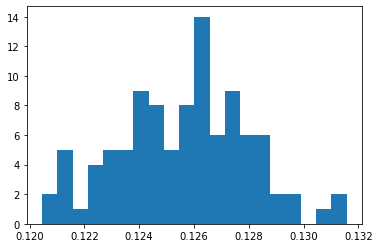

In [77]:
plt.hist(mse_lassosimul, bins=20)
plt.show()

- What value of alpha should we use? Let's try a bunch and plot the MSE for each

In [80]:
X_train, X_test, logy_train, logy_test = train_test_split(X,logy,test_size=.25, random_state=0)
alphas=np.arange(0.1,1.5,.05)
mse_alphas=np.zeros(len(alphas))
for i,a in enumerate(alphas):
    lasso=Lasso(alpha=a)
    lasso.fit(X_train,logy_train)
    temp=lasso.predict(X_test)
    mse_alphas[i] = mean_squared_error(logy_test,temp)

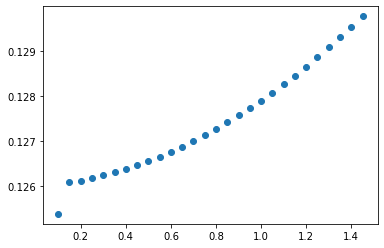

In [84]:
plt.scatter(alphas, mse_alphas)
plt.show()

- if alpha = 0, we are back to simple Linear Regressions